# Evaluation of COSMO testruns with ERA5: bias maps

end-product: maps (COSMO, ERA5 and difference) for  variable and  metric 

In [1]:
import valenspy as vp
from valenspy.processing.regrid import remap_cdo
from valenspy.processing.select import select_region
from valenspy.processing.select import select_point

from valenspy.diagnostic.visualizations import *

import warnings
import xarray as xr

# Turn off all warnings
warnings.filterwarnings('ignore')

### 0. Settings

In [7]:
# define machine name - used for paths of (observational) datasets
machine = 'hortense'

# reference dataset to compare to
model = 'CCLM'

manager = vp.InputManager(machine=machine)


In [8]:
# directory with experiments
experiments = ["EUR11_NU_TT_GC_TSO", 
               "EUR11_NU_TT_EC_TSO"]

In [5]:
# load model constant files 
ds_cst_globcover = xr.open_dataset('/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/test_experiments/EUR11_NU_TT_GC_TSO/lffd19950501000000c.nc')
ds_cst_ecoclimap = xr.open_dataset('/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/test_experiments/EUR11_NU_TT_EC_TSO/lffd19950501000000c.nc')

# remapping
ds_cst_globcover = remap_cdo(gridfile, ds_cst_globcover, remap_method = "con")
ds_cst_ecoclimap = remap_cdo(gridfile, ds_cst_ecoclimap, remap_method = "con")


NameError: name 'gridfile' is not defined

In [ ]:
# for remapping to CLIMATE_GRID
gridfile = manager._get_file_paths('CLIMATE_GRID','tas', path_identifiers=['latlon_5km'])[0]
gridfile

PosixPath('/dodrio/scratch/projects/2022_200/external/climate_grid/regridded/latlon_5km/TEMP_AVG_CLIMATE_GRID_1954_2023_daily_latlon_5km.nc')

In [ ]:

daily_statistic = 'mean'
variable = 'tas'
freq = "daily"

ds_globcover = manager.load_data(model, [variable], freq = freq, path_identifiers=["EUR11_NU_TT_GC_TSO", daily_statistic])

ds_ecoclimap = manager.load_data(model, [variable], freq = freq, path_identifiers=["EUR11_NU_TT_EC_TSO", daily_statistic])


ds_globcover = remap_cdo(gridfile, ds_globcover, remap_method = "con")
ds_ecoclimap = remap_cdo(gridfile, ds_ecoclimap, remap_method = "con")



File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/test_experiments/EUR11_NU_TT_GC_TSO/T_2M/daily/T_2M_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']
File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/test_experiments/EUR11_NU_TT_EC_TSO/T_2M/daily/T_2M_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']


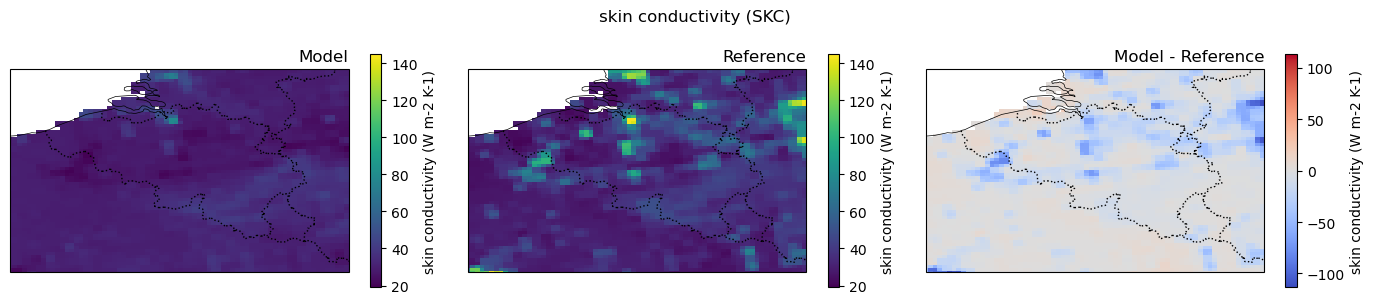

In [ ]:
region = 'belgium'


# do spatial selection
ds_cst_globcover_region = select_region(ds_cst_globcover, region=region)
ds_cst_ecoclimap_region = select_region(ds_cst_ecoclimap, region=region)

# select variable and corresponding period
da_skinconductivity_globcover = ds_cst_globcover_region['SKC']
da_skinconductivity_ecoclimap = ds_cst_ecoclimap_region['SKC']

da_diff = da_skinconductivity_ecoclimap - da_skinconductivity_globcover

ax = plot_maps_mod_ref_diff(da_skinconductivity_ecoclimap,  da_skinconductivity_globcover,  da_diff, region=region)


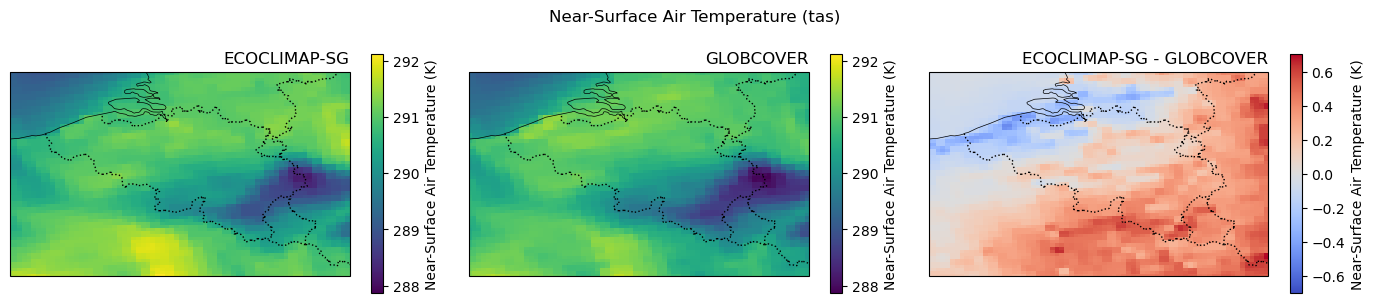

In [ ]:
# ------------------------------
# 3. Preprocessing: remapping and selection

region = 'belgium'

# do spatial selection
ds_globcover_region = select_region(ds_globcover, region=region)
ds_ecoclimap_region = select_region(ds_ecoclimap, region=region)


# select variable and corresponding period
da_globcover = ds_globcover_region[variable].sel(time=ds_globcover.time.dt.month.isin([6,7,8]))
da_ecoclimap = ds_ecoclimap_region[variable].sel(time=ds_ecoclimap.time.dt.month.isin([6,7,8]))

da_globcover = da_globcover.mean('time')
da_globcover.attrs['dataset'] = 'GLOBCOVER'
#da_globcover.attrs['units'] = 'K'

da_ecoclimap = da_ecoclimap.mean('time')
da_ecoclimap.attrs['dataset'] = 'ECOCLIMAP-SG'
#da_ecoclimap.attrs['units'] = 'K'

da_diff = da_ecoclimap - da_globcover

ax = plot_maps_mod_ref_diff(da_ecoclimap,  da_globcover,  da_diff, region=region)


## Brussels

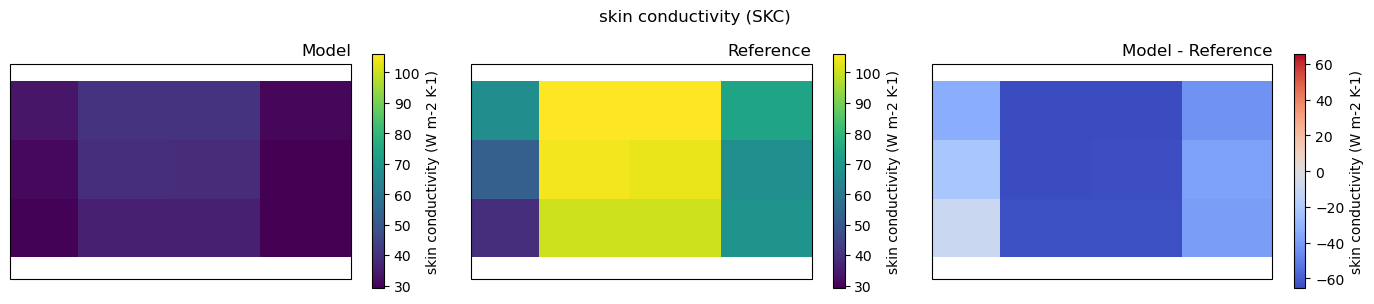

In [28]:
region = 'brussels'


# do spatial selection
ds_cst_globcover_region = select_region(ds_cst_globcover, region=region)
ds_cst_ecoclimap_region = select_region(ds_cst_ecoclimap, region=region)

# select variable and corresponding period
da_skinconductivity_globcover = ds_cst_globcover_region['SKC']
da_skinconductivity_ecoclimap = ds_cst_ecoclimap_region['SKC']

da_diff = da_skinconductivity_ecoclimap - da_skinconductivity_globcover

ax = plot_maps_mod_ref_diff(da_skinconductivity_ecoclimap,  da_skinconductivity_globcover,  da_diff, region=region)


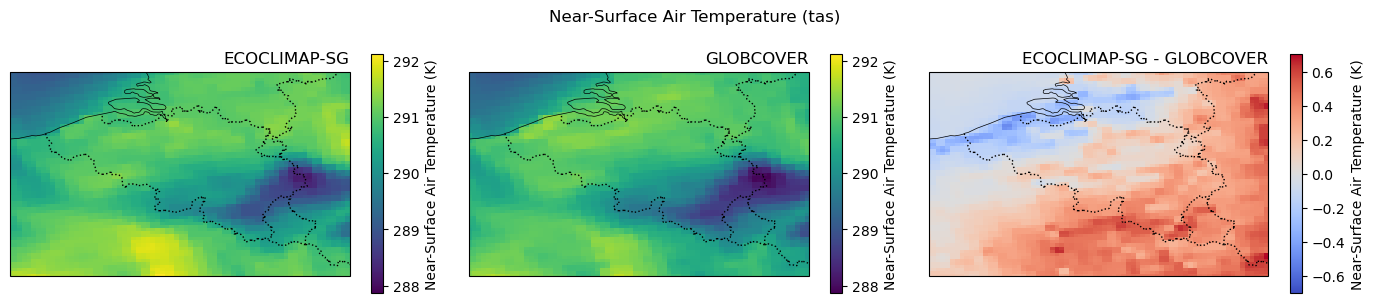

In [ ]:
# ------------------------------
# 3. Preprocessing: remapping and selection

region = 'brussels'

# do spatial selection
ds_globcover_region = select_region(ds_globcover, region=region)
ds_ecoclimap_region = select_region(ds_ecoclimap, region=region)


# select variable and corresponding period
da_globcover = ds_globcover_region[variable].sel(time=ds_globcover.time.dt.month.isin([6,7,8]))
da_ecoclimap = ds_ecoclimap_region[variable].sel(time=ds_ecoclimap.time.dt.month.isin([6,7,8]))

da_globcover = da_globcover.mean('time')
da_globcover.attrs['dataset'] = 'GLOBCOVER'
#da_globcover.attrs['units'] = 'K'

da_ecoclimap = da_ecoclimap.mean('time')
da_ecoclimap.attrs['dataset'] = 'ECOCLIMAP-SG'
#da_ecoclimap.attrs['units'] = 'K'

da_diff = da_ecoclimap - da_globcover

ax = plot_maps_mod_ref_diff(da_ecoclimap,  da_globcover,  da_diff, region=region)


## Diurnal cycle point in Brussels. 

In [13]:
ds_globcover = xr.open_dataset('/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/test_experiments/EUR11_NU_TT_EC_TSO/T_2M/diurnal/T_2M_diurnal_mean_1995-1995_6-8.nc').rename({'T_2M':'tas'})
ds_ecoclimap = xr.open_dataset('/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/test_experiments/EUR11_NU_TT_EC_TSO/T_2M/diurnal/T_2M_diurnal_mean_1995-1995_6-8.nc').rename({'T_2M':'tas'})


In [15]:
# start up input manager
manager = vp.InputManager(machine=machine)         

file_identifier = 'diurnal_mean'
variable = 'tas'
d_ds_mod_diurnalcycle = {}

experiments = [ 'EUR11_NU_TT_GC_TSO', 'EUR11_NU_TT_EC_TSO',]

for experiment in experiments: 

    # open COSMO data

    ds_mod = manager.load_data(model, [variable], freq="diurnal", path_identifiers=[experiment, file_identifier])

    d_ds_mod_diurnalcycle[experiment] = ds_mod


File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/test_experiments/EUR11_NU_TT_GC_TSO/T_2M/diurnal/T_2M_diurnal_mean_1995-1995_6-8.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']
File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/test_experiments/EUR11_NU_TT_EC_TSO/T_2M/diurnal/T_2M_diurnal_mean_1995-1995_6-8.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']


In [16]:
# select point
point = {'brussels_beurs': (4.349844433150445, 50.84821407765979 )} 
point_coord = point['brussels_beurs']

skinconductivity_globcover = select_point(da_skinconductivity_globcover, point_coord)
skinconductivity_ecoclimap = select_point(da_skinconductivity_ecoclimap, point_coord)


NameError: name 'da_skinconductivity_globcover' is not defined

In [ ]:
skinconductivity_ecoclimap.values

array([38.4767], dtype=float32)

In [ ]:
skinconductivity_globcover.values

array([103.416145], dtype=float32)

In [ ]:
ref_dataset='ERA5'
region = 'europe'

months_to_analyse = [6,7,8]

# use input manager to load data, defined on settings above
ds_obs = manager.load_data(ref_dataset,variable, period=[1995,1995],freq="hourly",region=region, path_identifiers = ["-hourly-"])

ds_obs_timesel = ds_obs.sel(time=ds_obs['time'].dt.month.isin(months_to_analyse))
ds_obs_diurnalcycle =  ds_obs_timesel.groupby("time.hour").mean("time")

da_obs_diurnalcycle = ds_obs_diurnalcycle[variable]
#da_obs_diurnalcycle = ds_obs_diurnalcycle[variable].rename({'hour':'time'})
#da_obs_diurnalcycle['time'] = ds_mod_diurnalcycle.time

File paths found:
/dodrio/scratch/projects/2022_200/external/era5/europe/2m_temperature/hourly/era5-hourly-europe-2m_temperature-1995.nc
The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']


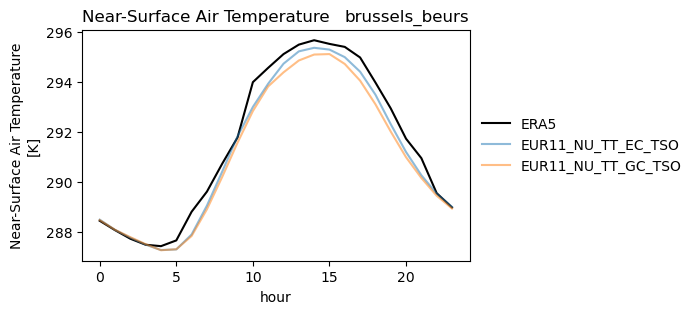

In [ ]:
# do plotting
fig, ax = plt.subplots(figsize = (5,3))

da_obs_point = select_point(da_obs_diurnalcycle,point_coord)

da_obs_point.plot(ax=ax, label = ref_dataset, color='k')

for experiment in experiments:
    ds_mod_diurnalcycle = d_ds_mod_diurnalcycle[experiment]
    ds_mod_point = select_point(ds_mod_diurnalcycle, point_coord, rotated_pole=True)
    da_mod_point = ds_mod_point[variable].rename({'time':'hour'})
    da_mod_point['hour'] = da_obs_point.hour
    
    da_mod_point.plot(ax=ax, label = experiment, alpha=0.5)

ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title(da_obs_point.attrs['long_name'], loc='left')
ax.set_title(' ', loc='center')
ax.set_title(f"brussels_beurs", loc='right'); 



Text(0.5, 1.0, '2m temperature difference (ECOCLIMAP-GLOBCOVER)')

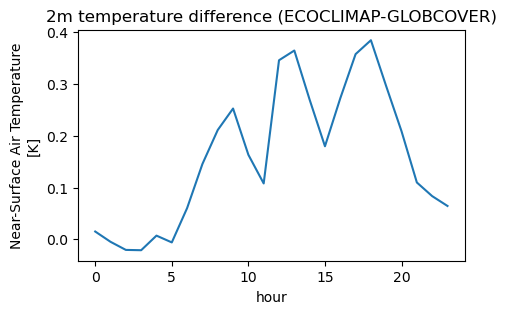

In [43]:
ds_mod_diurnalcycle = d_ds_mod_diurnalcycle[experiments[0]]
ds_mod_point = select_point(ds_mod_diurnalcycle, point_coord, rotated_pole=True)
da_mod_point_ec = ds_mod_point[variable].rename({'time':'hour'})
da_mod_point_ec['hour'] = da_obs_point.hour

ds_mod_diurnalcycle = d_ds_mod_diurnalcycle[experiments[1]]
ds_mod_point = select_point(ds_mod_diurnalcycle, point_coord, rotated_pole=True)
da_mod_point_gc = ds_mod_point[variable].rename({'time':'hour'})
da_mod_point_gc['hour'] = da_obs_point.hour

fig, ax = plt.subplots(figsize = (5,3))

da_diff = da_mod_point_ec - da_mod_point_gc
da_diff.plot(ax=ax)
ax.set_title('2m temperature difference (ECOCLIMAP-GLOBCOVER)')


### Timeseries skin conductivity

In [9]:
import valenspy as vp
from valenspy.preprocessing_tasks.select import select_point

import warnings
import xarray as xr
import matplotlib.pyplot as plt

# define machine name - used for paths of (observational) datasets
machine = 'hortense'

model = "CCLM"


experiments = ["EUR11_NU_TT_GC_TSO", 
               "EUR11_NU_TT_EC_TSO", 
               ]

d_point_coords = {
    'opwijk'    : (4.18, 50.97), 
    'betrix'    : (5.25, 49.854),
    'north_sea' : (2.465, 51.63),
'brussels_beurs': (4.349844433150445, 50.84821407765979 )
}
point_coord = d_point_coords['opwijk']


months_to_analyse = [5,6,7,8]


In [10]:
# ------------------------------
# 1. Load reference data


def plot_point_timeseries(variable: str, ref_dataset: str, experiments: list, point_coord: tuple, point_id:str,  months_to_analyse: list, ax=False): 
        
    # start up input manager
    manager = vp.InputManager(machine=machine)

    if ref_dataset=="ERA5": 
        region_to_load ="europe"
    elif ref_dataset=="ERA5-Land": 
        region_to_load = "belgium"

    # use input manager to load data, defined on settings above
    #ds_obs = manager.load_data(ref_dataset,variable, period=[1995,1995],freq="daily",region=region, path_identifiers = ["-daily-"])
    if ref_dataset == 'ERA5' or ref_dataset== 'ERA5-Land':

        if variable == 'tasmax':        
            variable_to_load = "tas"
            ds_obs = manager.load_data(ref_dataset,variable_to_load, period=[1995,1995],freq="hourly",region=region_to_load)
            ds_obs = ds_obs.resample(time='1D').max().rename({'tas':variable})


        elif variable == "tasmin": 
            variable_to_load = "tas"
            ds_obs = manager.load_data(ref_dataset,variable_to_load, period=[1995,1995],freq="hourly",region=region_to_load)
            ds_obs = ds_obs.resample(time='1D').min().rename({'tas':variable}) 

        elif variable == "pr": 
            ds_obs = manager.load_data(ref_dataset,variable, period=[1995,1995],freq="daily",region=region_to_load, path_identifiers=["sum"])
    
    elif ref_dataset == 'CLIMATE_GRID': 

        # use input manager to load data, defined on settings abov
        ds_obs = manager.load_data(ref_dataset,variable, path_identifiers=['latlon_5km'])

        # select corresponding year
        ds_obs = ds_obs.sel(time = ds_obs.time.dt.year.isin(1995))

        region = 'belgium'

    elif ref_dataset=='EOBS': 

        # use input manager to load data, defined on settings abov
        ds_obs = manager.load_data(ref_dataset,variable, path_identifiers=['0.1deg', 'mean'])
        ds_obs = ds_obs.sel(time = ds_obs.time.dt.year.isin(1995))

    
    # select point 
    ds_obs_point = select_point(ds_obs, point_coord)
    da_obs_point = ds_obs_point[variable].sel(time=ds_obs['time'].dt.month.isin(months_to_analyse))


    # generate path of CCLM output

    # dictorionary to save data arrays of experiments
    d_da_mod_point = {}

    for experiment in experiments: 


        # define the CCLM files for the corresponding variable
        if variable == "tasmax": 
            daily_statistic = "max"
            variable_mod = "tas"

        elif variable == "tasmin": 
            daily_statistic = "min"
            variable_mod = "tas"
        elif variable == "pr": 
            daily_statistic = "sum"
            variable_mod =  variable
        else: 
            daily_statistic = "mean"
            variable_mod = variable

        # load data
        ds_mod = manager.load_data(model, [variable_mod], freq="daily", path_identifiers=[experiment, daily_statistic])
        
        if variable =="tasmax" or variable =="tasmin": 
            ds_mod = ds_mod.rename({'tas':variable}) 

        # do selection
        ds_mod_point = select_point(ds_mod, point_coord, rotated_pole=True)

        da_mod_point = ds_mod_point[variable].sel(time=ds_mod['time'].dt.month.isin(months_to_analyse))

        d_da_mod_point[experiment] = da_mod_point

    # do plotting
    # when no ax element is passed, create the figure within the function
    if not ax: 
        fig, ax = plt.subplots(figsize = (7,3))

    if variable == 'pr': 
        da_obs_point = _convert_kg_m2s_to_mm_day(da_obs_point)
    da_obs_point.plot(ax=ax, label = ref_dataset, color='k')

    for experiment in d_da_mod_point: 
        if variable == 'pr': 
            d_da_mod_point[experiment] = _convert_kg_m2s_to_mm_day(d_da_mod_point[experiment])

        d_da_mod_point[experiment].plot(ax=ax, label = experiment, alpha=0.5)

    ax.set_title(' ', loc='center')
    ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
    ax.set_title(da_obs_point.attrs['long_name'], loc='left')

    # only add legend if stand-alone figure
    if not ax: 
        ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

        
    return ax



def plot_timeseries_fourpoints(variable, ref_dataset, experiments, d_point_coords,  months_to_analyse, unit_conversion=False):

    "Wrapper function to combine 4 point timeseries plot into one figure, with nice layout (legend and title)"
    fig, axes = plt.subplots(2,2,figsize = (16,6))
    axes = axes.flatten()

    for i,point_id in enumerate(d_point_coords): 
        ax = axes[i]
        ax = plot_point_timeseries(variable, ref_dataset, experiments, d_point_coords[point_id], point_id,  months_to_analyse, ax=ax)

        if i == 1: 
            ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

    fig.tight_layout()


File paths found:
/dodrio/scratch/projects/2022_200/external/climate_grid/regridded/latlon_5km/TEMP_MAX_CLIMATE_GRID_1954_2023_daily_latlon_5km.nc
The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tasmax']
File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/test_experiments/EUR11_NU_TT_GC_TSO/T_2M/daily/T_2M_daymax.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']
File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/test_experiments/EUR11_NU_TT_EC_TSO/T_2M/daily/T_2M_daymax.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds', 'rotate

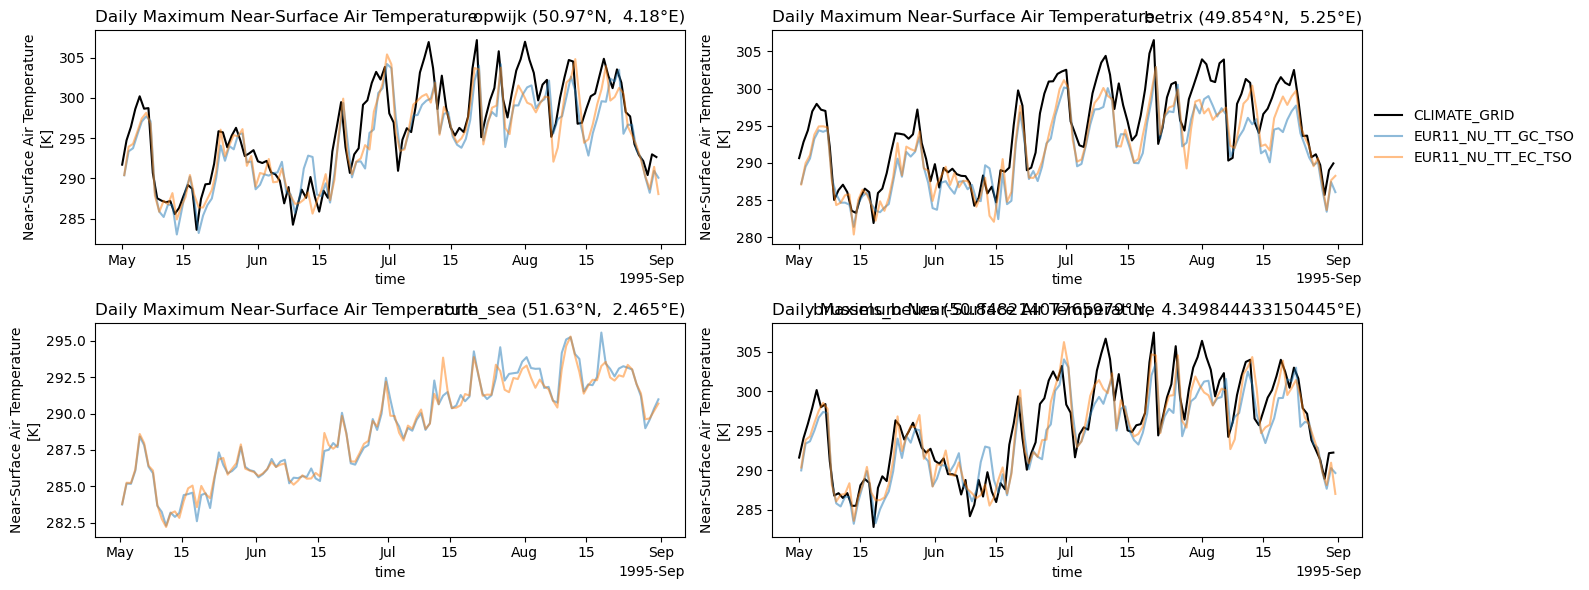

In [11]:
# variables of interest
variable = "tasmax"
region = 'Belgium'
ref_dataset = 'CLIMATE_GRID'
months_to_analyse = [5,6,7,8]

plot_timeseries_fourpoints(variable, ref_dataset, experiments, d_point_coords,  months_to_analyse)

In [12]:
%^ùµ* 

UsageError: Line magic function `%^ùµ*` not found.


In [ ]:
v, 